<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/Driver-Distraction-Detection/blob/main/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 7.6 kB/s 
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 240 kB 48.7 MB/s 
     |████████████████████████████████| 171 kB 49.4 MB/s 
     |████████████████████████████████| 503 kB 53.6 MB/s 
     |████████████████████████████████| 3.8 MB 43.0 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=820eb7ddb6244f7ea9b218879582f7f5cb3bd576c73f7f997d5e7a8abf958b95
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [13]:
df=pd.read_csv("/content/combinedSample_GoldDs.csv")

In [14]:
df=df[:25000]
df.shape

(25000, 11)

In [15]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2

In [16]:
df['Local time']=df['Local time'].str[0:16]
df['Local time']

0        14.03.2021 22:00
1        14.03.2021 22:01
2        14.03.2021 22:02
3        14.03.2021 22:03
4        14.03.2021 22:04
               ...       
24995    07.04.2021 10:35
24996    07.04.2021 10:36
24997    07.04.2021 10:37
24998    07.04.2021 10:38
24999    07.04.2021 10:39
Name: Local time, Length: 25000, dtype: object

In [17]:
data=df.drop(['Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask','Volume_Bid','Volume_Ask'],axis=1)

In [18]:
df=data

In [19]:
df['Local time'] = pd.to_datetime(df['Local time'])
df.dtypes

Local time    datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
dtype: object

In [20]:
df.set_index('Local time', inplace=True)
df.head()

,Open,High,Low,Close
Local time,,,,
2021-03-14 22:00:00,1727.4250,1729.6500,1727.3570,1728.8900
2021-03-14 22:01:00,1728.9735,1730.1210,1728.9285,1729.9145
2021-03-14 22:02:00,1729.9365,1730.4545,1729.8395,1730.3315
2021-03-14 22:03:00,1730.3265,1730.4645,1729.1980,1729.4530
2021-03-14 22:04:00,1729.4085,1729.6465,1728.5765,1728.9635


In [21]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [22]:
env.signal_features

array([[ 1.7288900e+03,  0.0000000e+00],
       [ 1.7299145e+03,  1.0245000e+00],
       [ 1.7303315e+03,  4.1700000e-01],
       [ 1.7294530e+03, -8.7850000e-01],
       [ 1.7289635e+03, -4.8950000e-01],
       [ 1.7264915e+03, -2.4720000e+00],
       [ 1.7263400e+03, -1.5150000e-01],
       [ 1.7259020e+03, -4.3800000e-01],
       [ 1.7263535e+03,  4.5150000e-01],
       [ 1.7275135e+03,  1.1600000e+00],
       [ 1.7274955e+03, -1.8000000e-02],
       [ 1.7268305e+03, -6.6500000e-01],
       [ 1.7268735e+03,  4.3000000e-02],
       [ 1.7275720e+03,  6.9850000e-01],
       [ 1.7274350e+03, -1.3700000e-01],
       [ 1.7272570e+03, -1.7800000e-01],
       [ 1.7275735e+03,  3.1650000e-01],
       [ 1.7271785e+03, -3.9500000e-01],
       [ 1.7274200e+03,  2.4150000e-01],
       [ 1.7272085e+03, -2.1150000e-01],
       [ 1.7273835e+03,  1.7500000e-01],
       [ 1.7275300e+03,  1.4650000e-01],
       [ 1.7274135e+03, -1.1650000e-01],
       [ 1.7273285e+03, -8.5000000e-02],
       [ 1.72607

In [23]:
env.action_space

Discrete(2)

info {'total_reward': -1.1244999999996708, 'total_profit': 0.6857638212371949, 'position': 0}


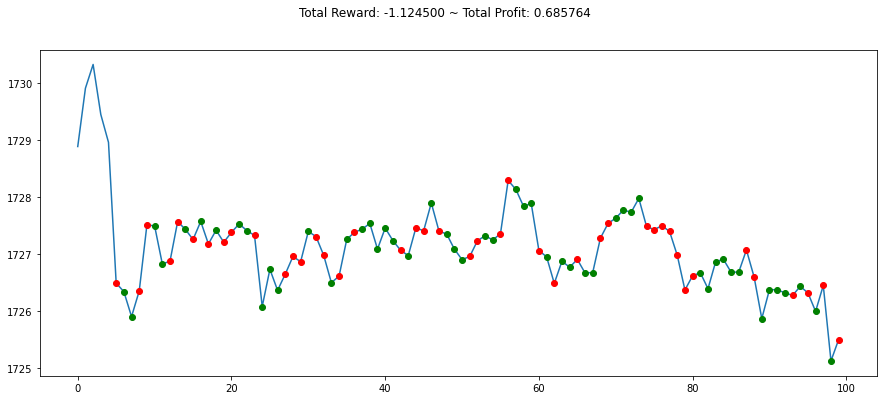

In [24]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [25]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [26]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
----------------------------------
| explained_variance | -1.35e-05 |
| fps                | 371       |
| nupdates           | 137600    |
| policy_entropy     | 0.677     |
| total_timesteps    | 688000    |
| value_loss         | 0.122     |
----------------------------------
----------------------------------
| explained_variance | -0.000204 |
| fps                | 371       |
| nupdates           | 137700    |
| policy_entropy     | 0.669     |
| total_timesteps    | 688500    |
| value_loss         | 0.279     |
----------------------------------
---------------------------------
| explained_variance | 0.0637   |
| fps                | 371      |
| nupdates           | 137800   |
| policy_entropy     | 0.657    |
| total_timesteps    | 689000   |
| value_loss         | 1.21     |
---------------------------------
---------------------------------
| explained_variance | 0.133    |
| fps                | 371      |
| nupdates     

In [27]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.24350000000004002, 'total_profit': 0.9275828722973332, 'position': 0}


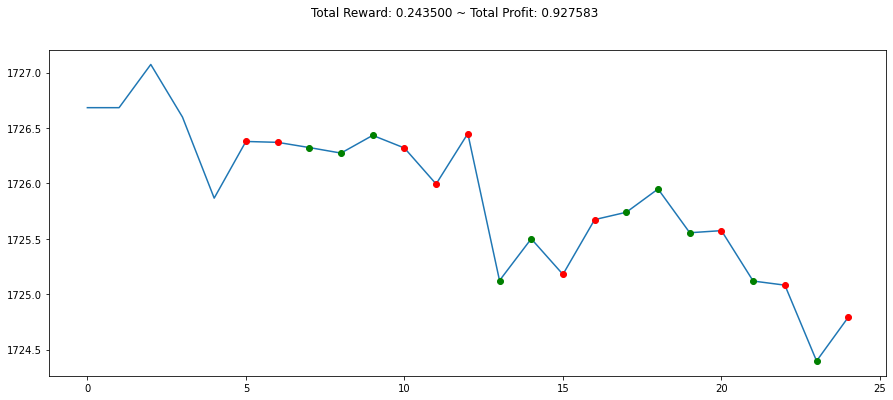

In [28]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()